<a href="https://colab.research.google.com/github/taherezzaier/Projet/blob/main/LNP_Word2Vec_dimensionality_reduction_Enonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [ ]:
# Set options for pandas

def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

In [ ]:
!wget 'https://raw.githubusercontent.com/PinkyBlond/R-Machine-Learning/master/News_Final.csv'

--2024-04-01 10:33:36--  https://raw.githubusercontent.com/PinkyBlond/R-Machine-Learning/master/News_Final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30338277 (29M) [text/plain]
Saving to: ‘News_Final.csv’

News_Final.csv      100%[===================>]  28.93M  75.0MB/s    in 0.4s    

2024-04-01 10:33:37 (75.0 MB/s) - ‘News_Final.csv’ saved [30338277/30338277]



In [ ]:
main_data = pd.read_csv('/content/News_Final.csv')

In [ ]:
main_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at ...,Obama Lays Wreath at ...,USA TODAY,obama,2002-04-02 00:00:00,0.0000,-0.0533,-1,-1,-1
1,10423.0,A Look at the Health ...,"Tim Haywood, investme...",Bloomberg,economy,2008-09-20 00:00:00,0.2083,-0.1564,-1,-1,-1
2,18828.0,Nouriel Roubini: Glob...,"Nouriel Roubini, NYU ...",Bloomberg,economy,2012-01-28 00:00:00,-0.4252,0.1398,-1,-1,-1
3,27788.0,Finland GDP Expands I...,Finland's economy exp...,RTT News,economy,2015-03-01 00:06:00,0.0000,0.0261,-1,-1,-1
4,27789.0,"Tourism, govt spendin...",Tourism and public sp...,The Nation - Thailand...,economy,2015-03-01 00:11:00,0.0000,0.1411,-1,-1,-1


In [ ]:
# Grab all the article titles
article_titles = main_data['Title']
article_titles.shape

(93239,)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Create a list of strings, where each string is an article title

In [ ]:
titles_list = [title for title in article_titles]

Collapse the list of strings into a single long string for processing

In [ ]:
big_title_string = ' '.join(titles_list)

Tokenize the string into words

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(big_title_string)


Remove non-alphabetic tokens, such as punctuation

In [ ]:
words = [word.lower() for word in tokens if word.isalpha()]

Filter out stopwords

In [ ]:
!pip install nltk
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

Print first 10 words

In [ ]:
words[:10]

['obama',
 'lays',
 'wreath',
 'at',
 'arlington',
 'national',
 'cemetery',
 'a',
 'look',
 'at']

Load Word2Vec model (trained on an enormous Google corpus)




In [ ]:
!ls /content/
!ls -l /content/model.bin
!pip install gensim
import gensim
model = gensim.models.Word2Vec.load('/content/model.bin')

1.zip  meta.json  model.bin  model.txt	News_Final.csv	README	sample_data
-rw-rw-r-- 1 root root 3521402360 Feb 20  2019 /content/model.bin


UnpicklingError: unpickling stack underflow

In [ ]:
!ls /content/
!ls -l /content/model.bin
model = gensim.models.Word2Vec.load('/content/model.bin')

1.zip  meta.json  model.bin  model.txt	News_Final.csv	README	sample_data
-rw-rw-r-- 1 root root 3521402360 Feb 20  2019 /content/model.bin


UnpicklingError: unpickling stack underflow

In [ ]:
!wget 'http://vectors.nlpl.eu/repository/11/1.zip'

--2024-04-01 10:37:19--  http://vectors.nlpl.eu/repository/11/1.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5700887510 (5.3G) [application/zip]
Saving to: ‘1.zip’

1.zip               100%[===================>]   5.31G  17.5MB/s    in 5m 26s  

2024-04-01 10:42:46 (16.7 MB/s) - ‘1.zip’ saved [5700887510/5700887510]



In [ ]:
!unzip "/content/1.zip"

Archive:  /content/1.zip
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/model.bin', binary = True)

Check dimension of word vectors


In [ ]:
model.vector_size

300

vector of economy

In [ ]:
economy_vec = model['economy_NOUN']
economy_vec[:20] # First 20 components

array([ 0.064179, -0.023943, -0.054868,  0.013135, -0.016876, -0.078478,
       -0.053538, -0.057861,  0.058194, -0.004115, -0.054536, -0.009436,
        0.020201,  0.001673, -0.046887,  0.133679,  0.021116,  0.105081,
        0.043895, -0.025106], dtype=float32)

Filter the list of vectors to include only those that Word2Vec has a vector for

In [ ]:
vector_list=[]
for m in words:
  if m+'_'+'NOUN' in model.key_to_index.keys():
    vector_list.append(model[m+'_'+'NOUN'])
  if m+'_'+'PROPN' in model.key_to_index.keys():
    vector_list.append(model[m+'_'+'PROPN'])
  if m+'_'+'VERB' in model.key_to_index.keys():
    vector_list.append(model[m+'_'+'VERB'])
  if m+'_'+'ADV' in model.key_to_index.keys():
    vector_list.append(model[m+'_'+'ADV'])

In [ ]:
#vector_list = [model[word] for word in words if word+'_'+'NOUN' in model.key_to_index.keys()]

Create a list of the words corresponding to these vectors


In [ ]:
words_filtered=[]
for m in words:
  if m+'_'+'NOUN' in model.key_to_index.keys():
    words_filtered.append(m)
  if m+'_'+'PROPN' in model.key_to_index.keys():
    words_filtered.append(m)
  if m+'_'+'VERB' in model.key_to_index.keys():
    words_filtered.append(m)
  if m+'_'+'ADV' in model.key_to_index.keys():
    words_filtered.append(m)

In [ ]:
#words_filtered = [word for word in words if word in model_vocab]

Zip the words together with their vector representations


In [ ]:
word_vec_zip = zip(words_filtered, vector_list)

Cast to a dict so we can turn it into a dataframe

In [ ]:
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(19132, 300)

In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
obama,-0.0288,0.0168,0.0400,0.0937,-0.0293,-0.0705,-0.0105,-0.0036,0.0400,-0.0101,-0.0309,-0.1069,-0.1228,0.0325,-0.0288,0.0982,-0.0341,0.0096,0.0070,-0.0832,0.0103,-0.0218,0.0991,-0.0359,-0.0534,0.0700,-0.0996,-0.0186,0.0737,-0.0471,0.0241,0.0480,-0.0741,-0.0211,-0.0135,0.0232,-0.0525,0.0147,0.0466,0.0391,0.0054,-0.0571,0.0855,0.0196,0.0282,0.0368,0.0837,-0.0773,-0.0605,-0.0078,-0.0316,-0.0210,0.0452,0.0206,0.0587,0.0115,-0.0705,-0.0191,0.0421,-0.0696,0.0411,0.0471,-0.0650,-0.0321,0.0097,-0.0687,-0.0291,-0.0768,-0.0489,0.0085,0.0309,0.1309,0.0421,0.0359,-0.0291,-0.0521,0.0768,0.0210,-0.0414,0.0004,-0.0377,0.0750,-0.0227,-0.0127,0.0405,0.0015,-0.0632,0.0452,0.0055,0.0199,-0.0157,0.0350,-0.0189,-0.0727,-0.0457,0.0375,-0.0548,-0.0357,0.1528,-0.0222,0.0446,-0.0352,0.1273,0.0100,-0.0421,0.0207,-0.0534,0.0318,-0.0123,-0.1291,0.0323,-0.1182,0.0659,0.0677,0.0855,0.0348,0.0288,-0.1123,-0.0341,0.0111,0.0225,-0.0140,0.0325,-0.0129,0.1219,0.0210,-0.0217,0.0260,0.0046,-0.0233,-0.0818,-0.0090,0.0800,-0.0098,-0.0131,-0.0278,-0.0741,-0.0484,0.1114,-0.0044,0.0723,-0.0787,0.0128,0.0093,-0.0525,-0.0266,-0.0049,-0.0314,0.0148,-0.0737,0.0868,-0.1400,-0.0423,-0.0787,-0.1078,-0.0473,0.0480,0.0571,-0.0491,0.0316,-0.0094,0.0496,-0.0371,0.0147,-0.0471,-0.1573,0.0398,0.0104,-0.0200,0.0655,-0.0950,0.0261,-0.0002,0.0018,-0.0098,-0.0111,0.0732,-0.1114,0.0543,-0.0978,-0.0206,0.0218,-0.0887,-0.0226,0.0075,0.0518,-0.0959,-0.0280,-0.0036,0.0163,0.0687,0.0818,-0.0007,0.0446,0.0008,0.0323,-0.1046,-0.0377,-0.0512,-0.0525,-0.2028,0.0291,0.0117,-0.1782,-0.0277,-0.0632,0.1119,-0.0114,-0.0773,0.0244,-0.0210,0.0339,-0.0732,-0.0534,0.0368,0.0144,-0.0605,-0.0591,-0.0269,-0.0489,-0.0837,0.0182,0.0247,0.0477,0.0562,-0.0127,0.0646,0.0864,0.0190,-0.0155,0.0805,-0.0260,-0.0223,-0.0918,-0.0102,0.0562,0.0546,0.0828,0.0169,-0.0151,0.0235,0.0568,0.0127,0.0384,-0.1114,0.0471,-0.0364,0.1437,-0.0131,-0.0687,-0.0085,-0.0030,0.0409,0.0258,0.1114,-0.0281,0.0416,-0.0386,-0.0071,-0.0668,0.0864,0.0196,0.0546,-0.0718,-0.0705,-0.0557,-0.0437,-0.0509,0.0176,-0.0914,-0.1128,0.0341,0.0732,0.0293,-0.0316,-0.0368,0.0562,-0.0837,0.0152,0.0318,-0.0307,-0.0177,-0.0116,0.0623,-0.1309,-0.0446,0.0015,-0.0778,0.0343,-0.0914,-0.0129,-0.0323,-0.0150,-0.0242,-0.0623,-0.0477,-0.0260,-0.0052,0.0156,0.0063
lays,-0.0157,-0.0173,0.0583,-0.0322,0.0900,-0.0500,0.0415,0.0377,-0.0097,-0.0290,-0.1130,0.0983,0.0151,0.0168,0.0018,0.0641,0.0144,0.0865,-0.0906,0.0750,-0.0293,0.0352,-0.0485,0.0703,0.0577,-0.0906,-0.0571,0.0371,-0.0650,0.0765,-0.0738,-0.0562,-0.0618,0.0941,-0.0084,-0.0635,0.0136,0.0633,0.0612,0.0206,0.0353,-0.0066,0.0204,0.0685,-0.0097,-0.0624,-0.0565,-0.0571,0.1118,-0.0067,-0.0109,0.0406,-0.0085,-0.1106,0.1083,-0.0391,-0.0662,-0.0941,0.0656,0.0912,0.0265,0.0744,0.0025,-0.0375,0.0332,-0.0109,0.0196,-0.0107,-0.0160,-0.0812,0.0169,0.0066,0.0080,-0.0894,0.0154,-0.0883,0.0039,0.1577,-0.0412,0.0724,-0.0606,-0.1089,0.0635,-0.0281,0.1283,-

Dimensionality Reduction: t-SNE

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

In [ ]:
!pip install adjustText

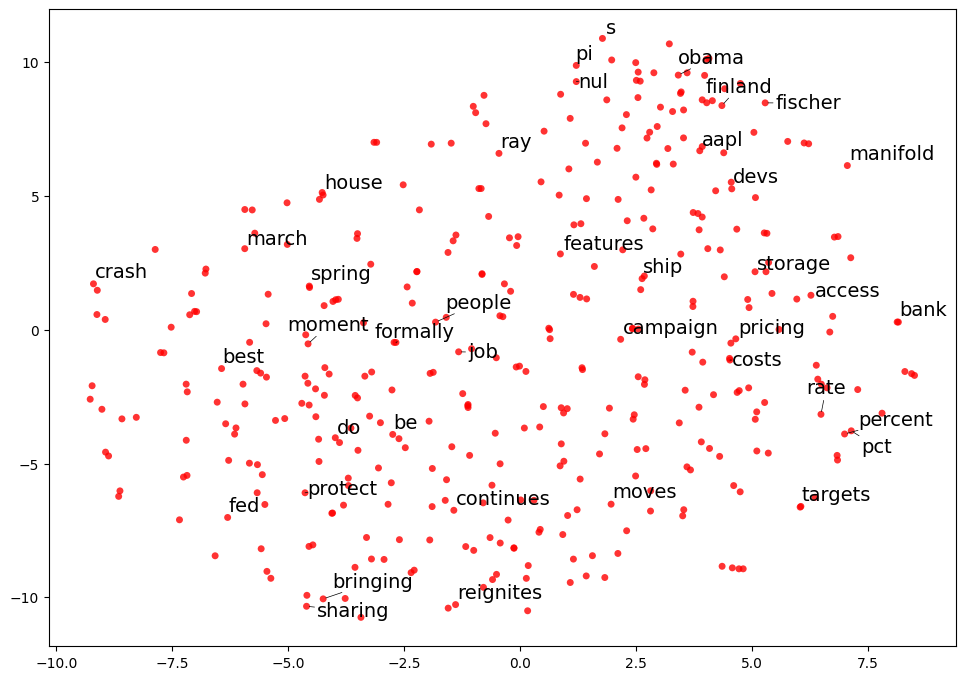

In [ ]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c='r', s=25, alpha=0.8, edgecolors='none')

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))

# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()